# Projeto Final - 2018  

## X-ray Pneumonia Classification
* Felipe Souza
* Pedro Augusto
* Rafael Dias
* Sergio Marinello


## Part 04 Transform Data

1. Healthy 
2. Pneumonia viral 
3. Pneumonia bacterial

### Data
#### Data Source
O dataset pode ser obtido em:
https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia


In [2]:
ROOT_DIR = "../input" #kaggle/git dir

# Import library
import os
if not (os.path.exists(ROOT_DIR)):
    print("Using git repository")
    ROOT_DIR = "./kowaslki/input" #colab dir
    if not (os.path.exists(ROOT_DIR)):    
        print("Checking out git repository")
        !git clone https://gitlab.com/rafa.apps/kowaslki.git
else:
    print("Using kaggle repository")


Using kaggle repository


## Verificação dos dados

In [3]:
%matplotlib inline

# Basic math libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


# Take note that the .7z directory name is automatically converted to lowercase. 
INPUT_DIR = '%s/chest_xray/chest_xray' % ROOT_DIR

import os.path
# Ensure we're reading the directory correctly.
assert (os.path.exists(INPUT_DIR))

First, locate the main directory and display its content.

In [4]:
directory = os.listdir(INPUT_DIR)
print("Parent directory includes these folders:", directory)

('Parent directory includes these folders:', ['.DS_Store', 'test', 'train', 'val'])


#### Pasta raiz contem train, test, and validation

In [5]:
datasetDir = INPUT_DIR
train_folder = '%s/train/' % datasetDir 
val_folder   = '%s/val/' % datasetDir
test_folder  = '%s/test/' % datasetDir

# Plot de uma imagem normal e uma com pneumonia

## Plot samples images

../input/chest_xray/chest_xray/train/NORMAL/IM-0305-0001.jpeg
../input/chest_xray/chest_xray/train/PNEUMONIA/person625_bacteria_2500.jpeg
../input/chest_xray/chest_xray/train/PNEUMONIA/person364_bacteria_1660.jpeg


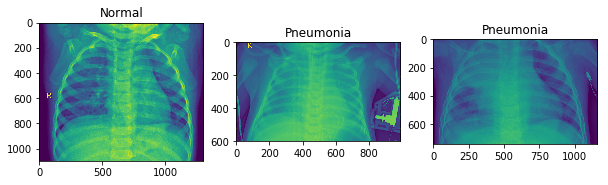

In [6]:
from skimage.io import imread

# train 
train_n = train_folder + 'NORMAL/'
train_p = train_folder + 'PNEUMONIA/'
# validation
val_n = val_folder + 'NORMAL/'
val_p = val_folder + 'PNEUMONIA/'
# test
test_n = test_folder + 'NORMAL/'
test_p = test_folder + 'PNEUMONIA/'

# plot images
f = plt.figure(figsize = (10, 10))

#imagem 1
filename =  os.listdir(train_n)[np.random.randint(0, len(os.listdir(train_n)))]
pic_path = train_n + filename
print(pic_path)
norm_image  = imread(pic_path)

# add_subplot(nrows, ncols, index, **kwargs)
a1 = f.add_subplot(1, 3, 1)
img_plot = plt.imshow(norm_image)
a1.set_title('Normal')

#imagem 2
filename =  os.listdir(train_p)[np.random.randint(0, len(os.listdir(train_p)))]
pic_path = train_p + filename
print(pic_path)
sic_image  = imread(pic_path)

a2 = f.add_subplot(1, 3, 2)
img_plot = plt.imshow(sic_image)
a2.set_title('Pneumonia')

#imagem 3
filename =  os.listdir(train_p)[np.random.randint(0, len(os.listdir(train_p)))]
pic_path = train_p + filename
print(pic_path)
sic_image  = imread(pic_path)

a2 = f.add_subplot(1, 3, 3)
img_plot = plt.imshow(sic_image)
a2.set_title('Pneumonia') 

#### Identificamos que existem diferentes dimensões e as vezes tonalidade em preto e branco.

## Método para identificar o os arquivos por treino/validação e teste e em normal e tipos de pneumonia

In [7]:
nbClasses = 3

# classes
NORMAL=0
BACTERIA=1
VIRUS=2

def getDatasetSize(split='train', types=[NORMAL,BACTERIA,VIRUS]):
    if split not in ["train", "val", "test"]:
        raise ValueError(split + " not recognized. Did you mean 'train', 'val' or 'test'?")
    splitDir = os.path.join(datasetDir, split)
    #Get all file names for that split
    if not type(types) in (list, tuple):
        types = [types]

    import glob
    fileNames = {}
    if NORMAL in types:
        fileNames[NORMAL] = [img for img in glob.glob(splitDir + "/NORMAL/*")]
    if BACTERIA in types:        
        fileNames[BACTERIA] = [img for img in glob.glob(splitDir + "/PNEUMONIA/*bacteria*")]
    if VIRUS in types:
        fileNames[VIRUS] = [img for img in glob.glob(splitDir + "/PNEUMONIA/*virus*")]
    
    n = sum([len(v) for v in fileNames.values()])
    return n

def getDatasetFiles(split='train', types=[NORMAL,BACTERIA,VIRUS]):
    if split not in ["train", "val", "test"]:
        raise ValueError(split + " not recognized. Did you mean 'train', 'val' or 'test'?")
    splitDir = os.path.join(datasetDir, split)
    #Get all file names for that split
    if not type(types) in (list, tuple):
        types = [types]
    
    import glob
    fileNames = {}
    if NORMAL in types:
        fileNames[NORMAL] = [img for img in glob.glob(splitDir + "/NORMAL/*")]
    if BACTERIA in types:        
        fileNames[BACTERIA] = [img for img in glob.glob(splitDir + "/PNEUMONIA/*bacteria*")]
    if VIRUS in types:
        fileNames[VIRUS] = [img for img in glob.glob(splitDir + "/PNEUMONIA/*virus*")]
    
    return fileNames

#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          width=8,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    f, ax = plt.subplots(1, 1, figsize=(width, width))
    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes, rotation=90)
    ax.set_yticklabels(classes)
    ax.grid(False)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    #axis[ax].axis('off')
    plt.tight_layout()
    return cm

## Verificando os subtipos de pneumonia

In [8]:

train_bacteria = getDatasetSize(split='train', types=[BACTERIA])
train_virus = getDatasetSize(split='train', types=[VIRUS])
val_bacteria = getDatasetSize(split='val', types=[BACTERIA])
val_virus = getDatasetSize(split='val', types=[VIRUS])
test_bacteria = getDatasetSize(split='test', types=[BACTERIA])
test_virus = getDatasetSize(split='test', types=[VIRUS])

print("train bacteria: %d" % train_bacteria)
print("train virus: %d" % train_virus)
print("val bacteria: %d" % val_bacteria)
print("val virus: %d" % val_virus)
print("test bacteria: %d" % test_bacteria)
print("test virus: %d" % test_virus)

train bacteria: 2530
train virus: 1345
val bacteria: 8
val virus: 0
test bacteria: 242
test virus: 148


## Aplicando LBP

In [9]:
from skimage.feature import local_binary_pattern
from skimage.color import rgb2gray
from skimage.transform import resize

import numpy as np

class LBP:
    def __init__(self, numPoints, radius):
        # store the number of points and radius
        self.numPoints = numPoints
        self.radius = radius

    def describe(self, image, eps=1e-7):
        # compute the Local Binary Pattern representation
        # of the image, and then use the LBP representation
        # to build the histogram of patterns
        lbp = local_binary_pattern(image, self.numPoints,
                                   self.radius, method="uniform")

        # return the histogram of Local Binary Patterns
        return lbp.flatten()

def crop_imread(img_pre, crop=[64,64]):
    "Function to crop center of an image file"
    ysize, xsize = np.array(img_pre).shape
    xoff = (xsize - crop[0]) // 2
    yoff = (ysize - crop[1]) // 2
    img = img_pre[yoff:-yoff,xoff:-xoff]
    return img


def process_files(func, subSet="train", image_reshape=(916, 916)):
    """ Process dataset files using a custom function """
    categ_files = getDatasetFiles(subSet)
    Y = []
    x = []

    for k,files_list in categ_files.items():
        for im_path in files_list:
            try:
                descriptor = func(image_path=im_path, 
                                  image_reshape=image_reshape)
            except:
                continue

            descriptor = np.array(descriptor)
            #print(descriptor.shape)
            x.append(descriptor)
            Y.append(k)

    return x, Y
  
# settings for LBP
radius = 3
n_points = 8 * radius

_lbp = LBP(n_points, radius)

def process_lbp(image_path, image_reshape=(916, 916)):
    image = imread(image_path)
    gray_image = rgb2gray(image)

    min_dim = min(gray_image.shape)

    image_resized = resize(gray_image, image_reshape)
    return _lbp.describe(image_resized)


In [10]:
# Test LBP
splitDir = os.path.join(datasetDir, "train")

import glob
#Get all file names for that split
fileNames = [img for img in glob.glob(splitDir + "/NORMAL/*")]
descriptor = process_lbp(fileNames[0], (916, 916))
print(descriptor.shape)

descriptor = process_lbp(fileNames[0], (316, 316))
print(descriptor.shape)

descriptor = process_lbp(fileNames[0], (256, 256))
print(descriptor.shape)

descriptor = process_lbp(fileNames[0], (256, 256))
print(descriptor.shape)

descriptor = process_lbp(fileNames[0], (192, 192))
print(descriptor.shape)

(839056,)
(99856,)
(65536,)
(65536,)
(36864,)


## Processa dados de treinamento

In [10]:
train_data = process_files(func=process_lbp, subSet="train", image_reshape=(192, 192))

### Store file

In [11]:
import pickle
filehandler = open("pickle-04-train_data.data", 'w')
pickle.dump(train_data, filehandler)   

del(filehandler)
del(pickle)

In [11]:
# Reload data from stored pickle file

import numpy as np
with open("pickle-04-train_data.data") as fp:
    fp.seek(0) # Only needed here to simulate closing & reopening file
    train_data = np.load(fp)

In [ ]:
x, Y = train_data

## Analisa dados utilizando T-sne

In [14]:

from time import time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold

n_components = 2
t0 = time()
print("t-SNE")
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
pos_tsne = tsne.fit_transform(x)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))


t-SNE: 2e+03 sec


In [15]:
filehandler = open("pickle-04-t-sne_data.data", 'w')
pickle.dump(tsne, filehandler)   


In [16]:
# Reload data from stored pickle file

#import numpy as np
#with open("pickle-04-t-sne_data.data") as fp:
#    fp.seek(0) # Only needed here to simulate closing & reopening file
#    tsne = np.load(fp)


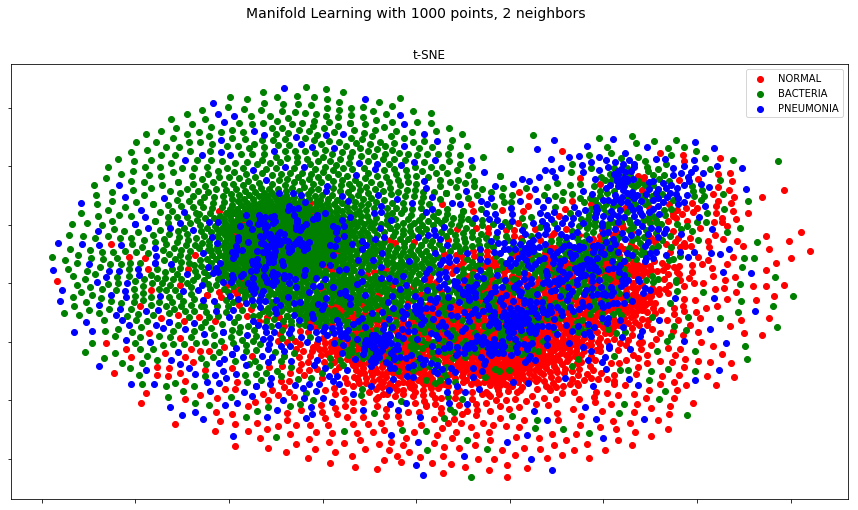

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_components), fontsize=14)

class_0_idx = [i for i in range(len(Y)) if Y[i] == 0]
class_1_idx = [i for i in range(len(Y)) if Y[i] == 1]
class_2_idx = [i for i in range(len(Y)) if Y[i] == 2]

# plot in 2 components
plt.scatter(pos_tsne[class_0_idx, 0], pos_tsne[class_0_idx, 1], c=["r"], cmap=plt.cm.Spectral)
plt.scatter(pos_tsne[class_1_idx, 0], pos_tsne[class_1_idx, 1], c=["g"], cmap=plt.cm.Spectral)
plt.scatter(pos_tsne[class_2_idx, 0], pos_tsne[class_2_idx, 1], c=["b"], cmap=plt.cm.Spectral)
ax = fig.add_subplot(111)
plt.title("t-SNE" )
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
ax.legend(('NORMAL', 'BACTERIA', 'VIRUS'),
           loc='upper right')
plt.show()



In [19]:
del(pos_tsne)
del(tsne)

import gc
gc.collect()

79

In [ ]:
"test"

'test'

## Treinamento usando SVM

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
print("Processing PCA")
x_pca = pca.fit_transform(x)

model = svm.SVC(kernel="rbf", decision_function_shape='ovo')

C_OPTIONS = [10e-3, 10e-2, 10e-1, 1, 10, 100]
GAMMA_OPTIONS = [10e-2, 10e-1, 1]
params = {"C":C_OPTIONS, "gamma":GAMMA_OPTIONS}
print("Training")
clf = GridSearchCV(model, cv=5, n_jobs=1, param_grid=params)
clf.fit(x_pca, Y)


In [ ]:
del(x)
del(Y)
del(x_pca)
del(train_data)

import gc 
gc.collect()


In [ ]:
clf.best_params_

In [ ]:
clf.best_score_

In [ ]:
val_data = process_files(func=process_lbp, subSet="val")

In [ ]:
import sklearn.metrics as metrics

# validation

x_val, Y_val = val_data

x_val = pca.transform(x_val)

Y_predicted = clf.predict(x_val)

cm = metrics.confusion_matrix(y_true=Y_val, y_pred=Y_predicted)
cm = plot_confusion_matrix(cm, range(1), normalize=True,
                           title='Confusion matrix',
                           width=4,cmap=plt.cm.Blues)

print("validation norm. accuracy: ", metrics.accuracy_score(Y_val, Y_predicted, normalize=True))


In [ ]:
del(val_data)
del(x_val)
del(Y_val)

import gc
gc.collect()

In [ ]:
# test
test_data = process_files(func=process_lbp, subSet="test")

In [ ]:
import sklearn.metrics as metrics

x_test, Y_test = test_data
x_test = pca.transform(x_test)
Y_predicted = clf.predict(x_test)

cm = metrics.confusion_matrix(y_true=Y_test, y_pred=Y_predicted)
cm = plot_confusion_matrix(cm, [0,1], normalize=True,
                           title='Confusion matrix',
                           width=4,cmap=plt.cm.Blues)

print("test norm. accuracy: ", metrics.accuracy_score(Y_test, Y_predicted, normalize=True))



In [ ]:
del(test_data)
del(x_test)
del(Y_test)

import gc
gc.collect()

## Baseline para classificação binaria (Normal vs Pneumonia)

In [ ]:
# Reload data from stored pickle file

import numpy as np
with open("pickle-04-train_data.data") as fp:
    fp.seek(0) # Only needed here to simulate closing & reopening file
    train_data = np.load(fp)

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

x, Y = train_data
Y = [0 if y == NORMAL else 1 for y in Y]
x_pca = pca.fit_transform(x)

C_OPTIONS = [1, 10, 100, 500]
GAMMA_OPTIONS = [10e-2, 10e-1, 10, 100]
params = {"C":C_OPTIONS, "gamma":GAMMA_OPTIONS}

model = svm.SVC(kernel="rbf", decision_function_shape='ovo')
clf = GridSearchCV(model, cv=5, n_jobs=1, param_grid=params)
clf.fit(x_pca, Y)


In [ ]:
import sklearn.metrics as metrics

val_data = process_files(func=process_lbp, subSet="val")
x_val, Y_val = val_data

# evaluate class Normal Vs Pneumonia
Y_val = [0 if y == NORMAL else 1 for y in Y_val]


In [ ]:
# validation
x_val = pca.transform(x_val)

Y_predicted = clf.predict(x_val)

cm = metrics.confusion_matrix(y_true=Y_val, y_pred=Y_predicted)
cm = plot_confusion_matrix(cm, range(1), normalize=True,
                           title='Confusion matrix',
                           width=4,cmap=plt.cm.Blues)

print("validation norm. accuracy: ", metrics.accuracy_score(Y_val, Y_predicted, normalize=True))


In [ ]:
del(val_data)
del(x_val)
del(Y_val)

import gc
gc.collect()

In [ ]:
# test
test_data = process_files(func=process_lbp, subSet="test")

x_test, Y_test = test_data
# evaluate class Normal(0) Vs Pneumonia (1)
Y_test = [0 if y == NORMAL else 1 for y in Y_test]

x_test = pca.transform(x_test)

Y_predicted = clf.predict(x_test)

cm = metrics.confusion_matrix(y_true=Y_test, y_pred=Y_predicted)
cm = plot_confusion_matrix(cm, [0,1], normalize=True,
                           title='Confusion matrix',
                           width=4,cmap=plt.cm.Blues)

print("test norm. accuracy: ", metrics.accuracy_score(Y_test, Y_predicted, normalize=True))



In [ ]:
del(test_data)
del(x_test)
del(Y_test)

import gc
gc.collect()